# 4. Analyzing the effect of weather on policing

Dalam bab ini, Anda akan menggunakan set data kedua untuk mengeksplorasi dampak kondisi cuaca pada perilaku polisi selama lalu lintas berhenti. Anda akan berlatih *merging* dan *reshaping* kumpulan data, menilai apakah sumber data dapat dipercaya, bekerja dengan data kategorikal, dan keterampilan lanjutan lainnya.

## Preparing Data

In [45]:
# Import pandas & matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Assign file url weather
file_weather = 'https://assets.datacamp.com/production/repositories/1497/datasets/02f3fb2d4416d3f6626e1117688e0386784e8e55/weather.csv'
# Read 'weather.csv' into a DataFrame named 'weather'
weather = pd.read_csv(file_weather)

# Assign url file police
file_police = 'https://assets.datacamp.com/production/repositories/1497/datasets/62bd9feef451860db02d26553613a299721882e8/police.csv'
# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv(file_police)
# Drop the 'county_name' and 'state' columns
ri.drop(['county_name', 'state'], axis='columns', inplace=True)
# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)
# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

## Exploring the weather dataset

### Plotting the temperature

Dalam latihan ini, Anda akan memeriksa kolom suhu dari dataset cuaca untuk menilai apakah data tersebut tampaknya dapat dipercaya. Pertama Anda akan mencetak statistik ringkasan, dan kemudian Anda akan memvisualisasikan data menggunakan box plot.

Saat memutuskan apakah nilainya tampak masuk akal, perlu diingat bahwa suhu diukur dalam derajat Fahrenheit, bukan Celcius!

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


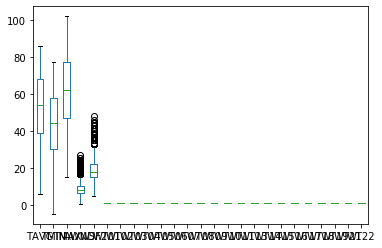

In [46]:
# Describe the temperature columns
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

# Create a box plot of the temperature columns
weather.plot(kind='box')

# Display the plot
plt.show()

**Note** : Data suhu terlihat bagus sejauh ini: nilai-nilai `TAVG` berada di antara `TMIN` dan `TMAX`, dan pengukuran serta rentangnya tampak masuk akal.

### Plotting the temperature difference

Dalam latihan ini, Anda akan terus menilai apakah dataset tampak dapat dipercaya dengan memplot perbedaan antara suhu maksimum dan minimum.

Apa yang Anda perhatikan tentang histogram yang dihasilkan? Apakah itu sesuai dengan harapan Anda, atau apakah Anda melihat sesuatu yang tidak biasa?

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


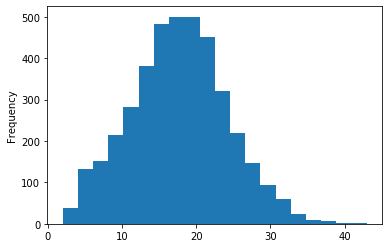

In [47]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']

# Describe the 'TDIFF' column
print(weather['TDIFF'].describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind='hist', bins=20)

# Display the plot
plt.show()

**Note** : Kolom `TDIFF` tidak memiliki nilai negatif dan distribusinya mendekati normal, keduanya merupakan tanda bahwa data dapat dipercaya.

## Categorizing the weather

### Counting bad weather conditions

DataFrame `weather` berisi 20 kolom yang dimulai dengan `'WT'`, yang masing-masing mewakili kondisi cuaca buruk. Sebagai contoh:

* `WT05` indicates "Hail"
* `WT11` indicates "High or damaging winds"
* `WT17` indicates "Freezing rain"

Untuk setiap baris dalam dataset, setiap kolom `WT` berisi `1` (artinya ada kondisi hari itu) atau `NaN` (artinya kondisi tidak ada).

Dalam latihan ini, Anda akan menghitung "seberapa buruk" cuaca itu setiap hari dengan menghitung jumlah `1` nilai di setiap baris.

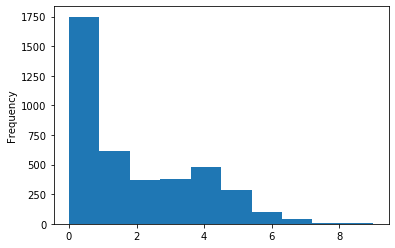

In [48]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind='hist')

# Display the plot
plt.show()

**Note** : Sepertinya berhari-hari tidak ada kondisi cuaca buruk, dan hanya sebagian kecil hari yang memiliki lebih dari empat kondisi cuaca buruk.

### Rating the weather conditions

Pada latihan sebelumnya, Anda menghitung jumlah kondisi cuaca buruk setiap hari. Dalam latihan ini, Anda akan menggunakan penghitungan untuk membuat sistem peringkat untuk cuaca.

Hitungannya berkisar dari 0 hingga 9, dan harus dikonversi ke peringkat sebagai berikut:

* Convert `0` to `'good'`
* Convert `1` through `4` to `'bad'`
* Convert `5` through `9` to `'worse'`

In [49]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


**Note** : Sistem peringkat ini harus membuat data kondisi cuaca lebih mudah dipahami.

### Changing the data type to category

Karena kolom `rating` hanya memiliki beberapa nilai yang mungkin, Anda akan mengubah tipe datanya ke kategori untuk menyimpan data lebih efisien. Anda juga akan menentukan urutan logis untuk kategori, yang akan berguna untuk latihan di masa mendatang.

In [50]:
weather.rating.dtype

dtype('O')

In [51]:
from pandas.api.types import CategoricalDtype

# Create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

# Change the data type of 'rating' to category
# Versi pandas datacamp '0.20.3', untuk versi '0.25.3' ganti astype dengan pd.Categorical
# weather['rating'] = weather.rating.astype('category', ordered=True, categories=cats)
weather['rating'] = pd.Categorical(weather.rating, categories=cats, ordered=True)

# Examine the head of 'rating'
print(weather.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]


**Note** : Anda akan menggunakan kolom `rating` di latihan selanjutnya untuk menganalisis efek cuaca terhadap perilaku polisi.

## Merging datasets

### Preparing the DataFrames

Dalam latihan ini, Anda akan menyiapkan DataFrames pemberhentian lalu lintas dan peringkat cuaca sehingga siap untuk digabungkan:

1. Dengan DataFrame `ri`, Anda akan memindahkan indeks `stop_datetime` ke kolom karena indeks akan hilang selama merge.

2. Dengan DataFrame `weather`, Anda akan memilih `DATE` dan kolom `rating` kemudian meletakkannya di DataFrame baru.

In [53]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)

# Examine the head of 'ri'
ri.head()

,stop_datetime,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [54]:
# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE', 'rating']]

# Examine the head of 'weather_rating'
weather_rating.head()

,DATE,rating
0,2005-01-01,bad
1,2005-01-02,bad
2,2005-01-03,bad
3,2005-01-04,bad
4,2005-01-05,bad


**Note** : DataFrames `ri` dan `weather_rating` sekarang siap untuk digabungkan (*merged*).

### Merging the DataFrames

Dalam latihan ini, Anda akan menggabungkan DataFrames `ri` dan `weather_rating` menjadi DataFrame baru, `ri_weather`.

DataFrames akan digabungkan menggunakan kolom `stop_date` dari `ri` dan kolom `DATE` dari `weather_rating`. Untungnya, format tanggal benar-benar cocok, **yang tidak selalu terjadi!**.

Setelah penggabungan selesai, Anda akan menetapkan `stop_datetime` sebagai indeks, yang merupakan kolom yang Anda simpan di latihan sebelumnya.

In [55]:
# Examine the shape of 'ri'
print(ri.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

(86536, 14)
(86536, 16)


**Note** : Di bagian selanjutnya, Anda akan menggunakan `ri_weather` untuk menganalisis hubungan antara kondisi cuaca dan perilaku polisi.

## Does weather affect the arrest rate?

### Comparing arrest rates by weather rating

Apakah petugas polisi lebih sering menangkap pengemudi ketika cuaca buruk? Cari tahu di bawah!

1. Pertama, Anda akan menghitung tingkat penangkapan keseluruhan.
2. Kemudian, Anda akan menghitung tingkat penangkapan untuk setiap rating cuaca yang sebelumnya Anda tetapkan.
3. Terakhir, Anda akan menambahkan jenis pelanggaran sebagai faktor kedua dalam analisis, untuk melihat apakah itu merupakan perbedaan dalam tingkat penangkapan.

Karena Anda sebelumnya menetapkan urutan logis untuk kategori cuaca, `good < bad < worse`, mereka akan diurutkan seperti itu dalam hasil.

In [56]:
# Calculate the overall arrest rate
print(ri_weather.is_arrested.mean())

0.0355690117407784


In [57]:
# Calculate the arrest rate for each 'rating'
print(ri_weather.groupby('rating').is_arrested.mean())

rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64


In [58]:
# Calculate the arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(['violation', 'rating']).is_arrested.mean())

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


**Note** : Wow! Tingkat penangkapan meningkat ketika cuaca memburuk, dan tren itu bertahan di banyak jenis pelanggaran. Ini tidak membuktikan hubungan sebab akibat, tetapi ini merupakan hasil yang cukup menarik!

### Selecting from a multi-indexed Series

Output dari operasi `.groupby()` tunggal pada banyak kolom adalah Series dengan MultiIndex. Bekerja dengan objek jenis ini mirip dengan bekerja dengan DataFrame:

* Level indeks luar seperti baris DataFrame.
* Level indeks dalam adalah seperti kolom DataFrame.

Dalam latihan ini, Anda akan berlatih mengakses data dari Series multi-indeks menggunakan `.loc[]` accessor.

In [59]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate)

# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc['Moving violation', 'bad'])

# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64
0.05804964058049641
rating
good     0.013405
bad      0.013314
worse    0.016886
Name: is_arrested, dtype: float64


**Note** : Accessor `.loc[]` adalah alat yang kuat dan fleksibel untuk pemilihan data.

### Reshaping the arrest rate data

Dalam latihan ini, Anda akan mulai dengan membentuk kembali (*reshaping*) Series `arrest_rate` menjadi DataFrame. Ini adalah langkah yang berguna ketika bekerja dengan Series multi-indeks, karena memungkinkan Anda untuk mengakses berbagai metode DataFrame.

Lalu, Anda akan membuat DataFrame yang sama persis menggunakan tabel pivot. Ini adalah contoh yang bagus tentang bagaimana pandas sering memberi Anda lebih dari satu cara untuk mencapai hasil yang sama!

In [60]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886
rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886


**Note** : Di masa mendatang, ketika Anda perlu membuat DataFrame seperti ini, Anda dapat memilih metode mana saja yang paling masuk akal bagi Anda.